OECD API with Python
======

## Example showing GDP per hour worked, for selected country

-----

*January 2026*<br>
*@bd_econ*

The documentation for the Organization for Economic Cooperation and Development (OECD) API can be found [here](https://data.oecd.org/api/)

In [1]:
import requests
import pandas as pd
import io

### Fetch Data

Use [Data Explorer](https://data-explorer.oecd.org/) to find url for API request.

In [2]:
# url obtained from OECD Data Explorer
url = ('https://sdmx.oecd.org/public/rest/data/'+
       'OECD.SDD.TPS,DSD_PDB@DF_PDB_LV,1.0/'+
       'DNK+FIN+NOR+SWE+USA.A.GDPHRS..USD_PPP_H.Q...?'+
       'startPeriod=2020&format=csvfilewithlabels')

r = requests.get(url)

### Clean Data 

In [3]:
# Read into pandas dataframe and clean data
res = pd.read_csv(io.StringIO(r.text))
data = res.set_index(['REF_AREA', 'TIME_PERIOD'])['OBS_VALUE'].unstack().T
data.index = pd.to_datetime(data.index, format='%Y')
data.index.name = ''
data.columns.name = ''

### Create Chart

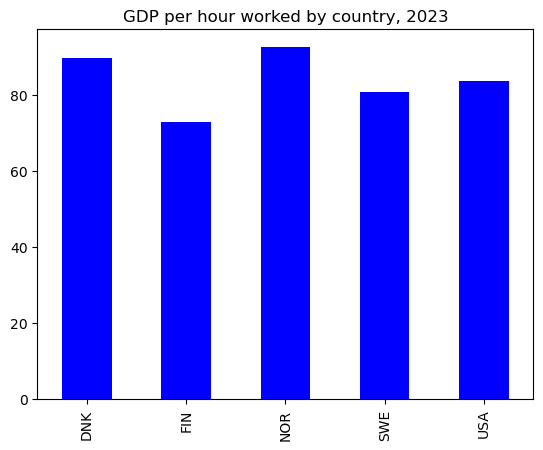

In [4]:
# Create bar chart
year = data.dropna().index[-1].year
title = f'GDP per hour worked by country, {year}'
data.dropna().iloc[-1].plot(kind='bar', color='blue', title=title);

In [12]:
rn = {'DNK': 'Denmark', 'FIN': 'Finland', 'NOR': 'Norway', 'SWE': 'Sweden'}
res = data.dropna().iloc[-1].round(1).rename(rn)
res.name = 'Value'
res.to_csv('/home/brian/Documents/bdecon.github.io/files/lprodbar.csv', index_label='Country')

### Poverty Rate

In [27]:
url = ('https://sdmx.oecd.org/public/rest/data/'+
       'OECD.WISE.INE,DSD_WISE_IDD@DF_IDD,1.0/'+
       'DNK+FIN+NOR+SWE+USA.A.PR_INC_DISP..PT_POP._T.METH2012.D_CUR.PL_50'+
       '?startPeriod=2022&format=csvfilewithlabels')

In [28]:
r = requests.get(url)

In [29]:
# Read into pandas dataframe and clean data
res = pd.read_csv(io.StringIO(r.text))
data = res.set_index(['REF_AREA', 'TIME_PERIOD'])['OBS_VALUE'].unstack().T
data.index = pd.to_datetime(data.index, format='%Y')
data.index.name = ''
data.columns.name = ''

In [30]:
res = data.dropna().iloc[-1].round(1).rename(rn)
res.name = 'Value'
res.to_csv('/home/brian/Documents/bdecon.github.io/files/povbar.csv', index_label='Country')

In [31]:
res


Denmark     6.3
Finland     6.7
Norway      8.0
Sweden      8.4
USA        18.1
Name: Value, dtype: float64

### Government Spending

In [32]:
url = ('https://sdmx.oecd.org/public/rest/data/'+
       'OECD.SDD.NAD,DSD_NAAG_VI@DF_NAAG_OTEF,/'+
       'A.DNK+FIN+NOR+SWE+USA.OTES13F._T..'+
       '?startPeriod=2023&endPeriod=2023&format=csvfilewithlabels')
r = requests.get(url)
# Read into pandas dataframe and clean data
res = pd.read_csv(io.StringIO(r.text))
data = res.set_index(['REF_AREA', 'TIME_PERIOD'])['OBS_VALUE'].unstack().T
data.index = pd.to_datetime(data.index, format='%Y')
data.index.name = ''
data.columns.name = ''
res = data.dropna().iloc[-1].round(1).rename(rn)
res.name = 'Value'
res.to_csv('/home/brian/Documents/bdecon.github.io/files/govexpbar.csv', index_label='Country')